<h1 align="center" style="background-color:DodgerBlue;">Desafío - Gráficos y correlación</h1>

>● Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
>
>● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
>
>● Desarrollo desafío: Individual.
>
>● Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío -Gráficos y correlación.
### Habilidades a evaluar
>
>● Reconocer las funcionalidades avanzadas de gráficos estáticos mediante seaborn.
>
>● Aprender a realizar gráficos que muestren de forma estratificada el comportamiento de subconjuntos de elementos en la muestra.
>
>● Aplicar funciones a columnas de datos mediante ufuncs, map-reduce-filter.
>
>● Entender e interpretar la correlación a partir de diagramas de dispersión.
### Descripción
>La empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, está vez, a partir de gráficos existentes y la correlación que existe entre ellos con la data disponible. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.
>
>Requerimientos
>
>A continuación revisaremos los requerimientos y acciones que te han sido solicitados:
>
>1. Importar librerías y .csv. (2 punto) para ello:
>
>● Importe las librerías básicas para el análisis de datos
>
>● Descargue e importe el archivo nations.csv.
>
>Tip: El formato del archivo posee una codificación de tipo 'iso-8859-1'. Investigue cómo se puede solucionar este problema utilizando el argumento encoding de pd.read_csv.
>
>La base de datos contiene información a nivel mundial sobre demografía:
>
>● country: País.
>
>● region: Continente del país.
>
>● gdp: Producto Interno Bruto per cápita, precios 2005.
>
>● school: Promedio años de escolaridad.
>
>● adfert: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
>
>● chldmort: Probabilidad de muerte antes de los 5 años por cada 1000.
>
>● life: Esperanza de vida al nacer.
>
>● pop: Población total.
>
>● urban: Porcentaje de población urbana.
>
>● femlab: Tasa entre hombres y mujeres en el mercado laboral.
>
>● literacy: Tasa de alfabetismo.
>
>● co2: Toneladas de Co2 mitidas per cápita.
>
>● gini: Coeficiente de desigualdad del ingreso.
>
>● Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.
>
>● Apellidos desde la M hasta la Z: Enfocarse en las variables femlab, literacy y school.


In [26]:
#1. Importar librerías y .csv. (2 punto) para ello:
#● Importe las librerías básicas para el análisis de datos

%matplotlib inline
import pandas as pd
import numpy as np
import lec4_graphs as gfx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
#● Descargue e importe el archivo nations.csv
df = pd.read_csv('datasets/nations.csv', encoding='latin-1')
df.head()

Unnamed: 0       country  region           gdp    school      adfert  \
0           1       Algeria  Africa   7300.399902  6.716667    7.300000   
1           2         Benin  Africa   1338.800049  3.100000  111.699997   
2           3      Botswana  Africa  12307.400391  8.600000   52.099998   
3           4  Burkina Faso  Africa   1063.400024  1.300000  124.800003   
4           5       Burundi  Africa    349.200012  2.483333   18.600000   

   chldmort       life       pop      urban  femlab   literacy   co2  \
0     34.75  72.316666  34172236  64.933334  0.4522  72.599998  15.0   
1    122.75  54.733334   8237634  41.000000  0.8482  41.700001   1.2   
2     60.25  52.250000   1941233  59.250000  0.8870  84.099998   9.2   
3    170.50  53.783333  15308383  23.583334  0.8584  23.600000   0.2   
4    168.50  48.866665   7821783  10.250000  1.0344  66.599998   0.1   

        gini  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4  33.299999

<AxesSubplot:>

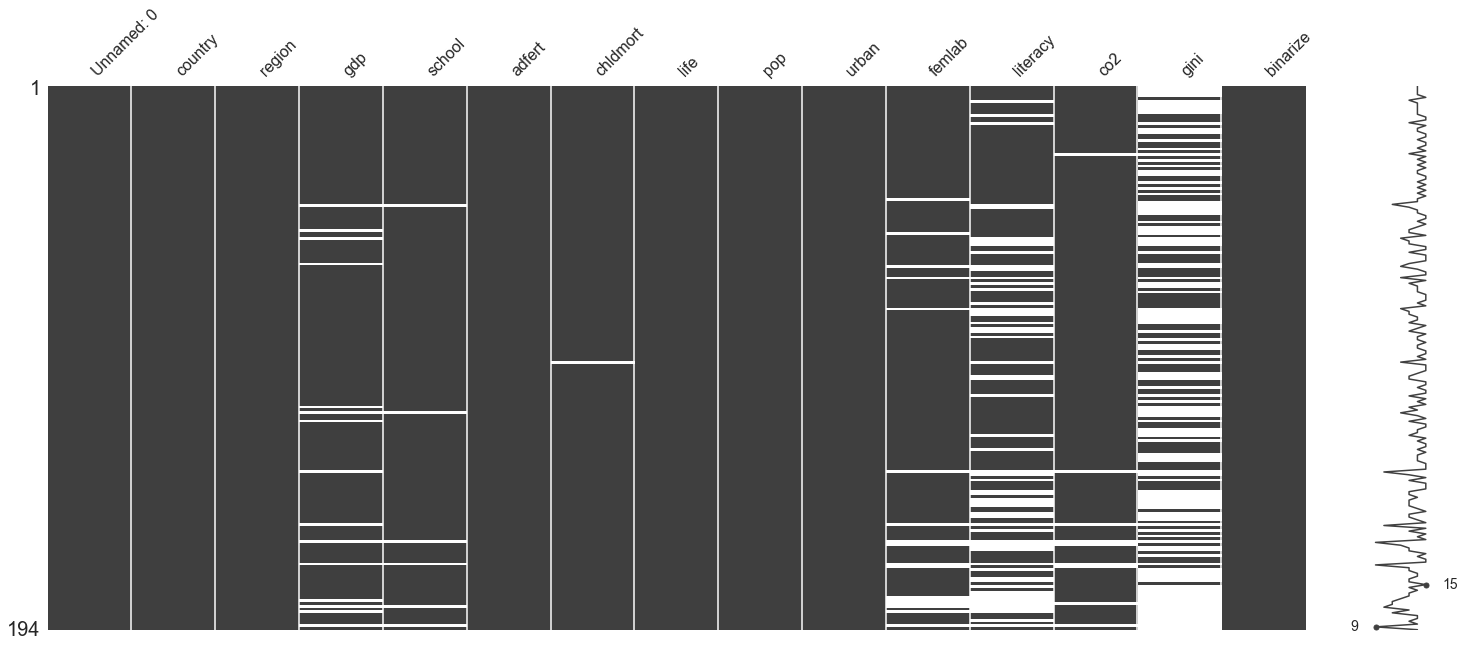

In [27]:
msno.matrix(df)

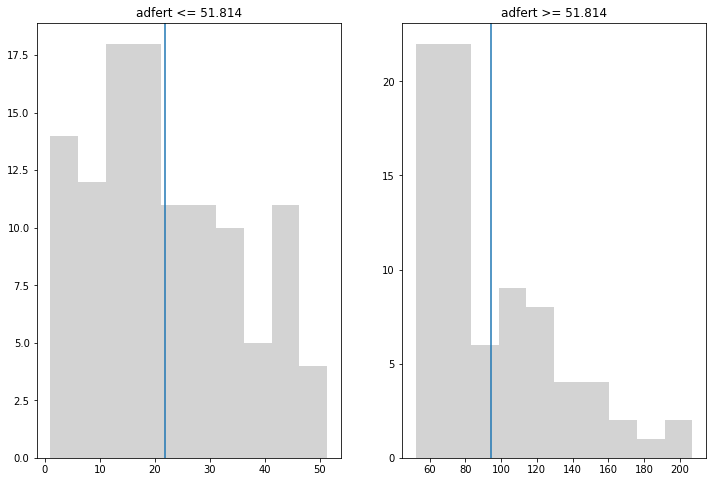

In [3]:
#2. Refactorizar gráficos matplotlib a seaborn (3 puntos). A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn.
# Además, se presenta la función que se utilizó para construirlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.
#● Histogramas
gfx.binarize_histogram_plt(df, 'adfert')

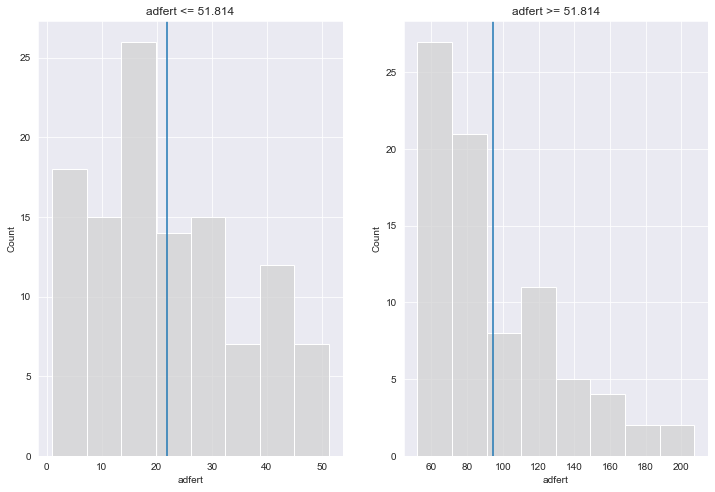

In [25]:
gfx.binarize_histogram_sns(df, 'adfert')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Producto interno bruto', ylabel='Density'>

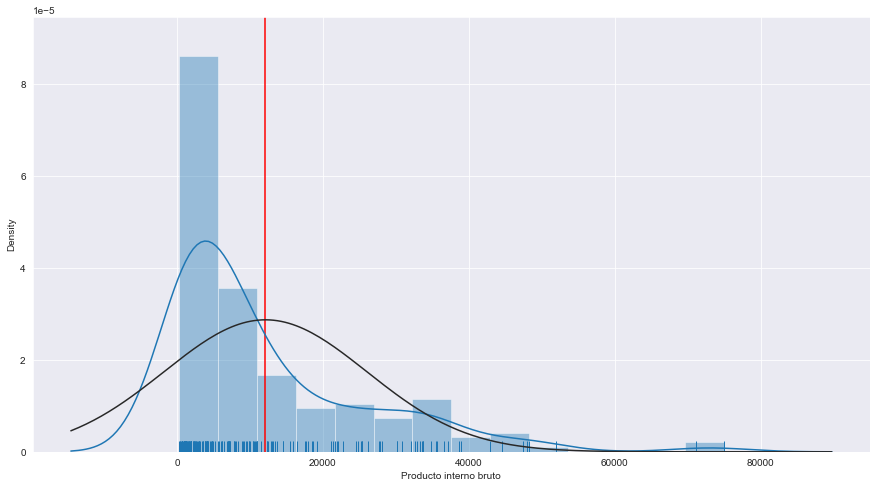

In [37]:
plt.figure(figsize=(15,8))
plt.axvline(np.mean(df['gdp']), color='red')
sns.distplot(df['gdp'],rug=True, axlabel='Producto interno bruto',
            fit=stats.norm)

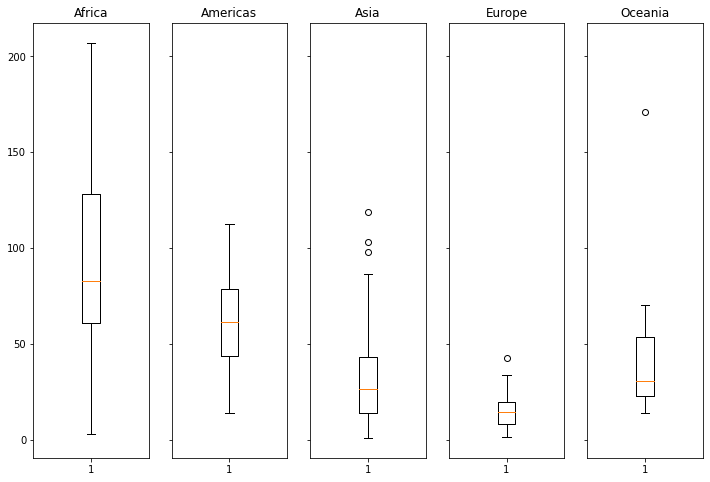

In [4]:
#● Boxplots
gfx.grouped_boxplot(df, 'adfert', 'region')

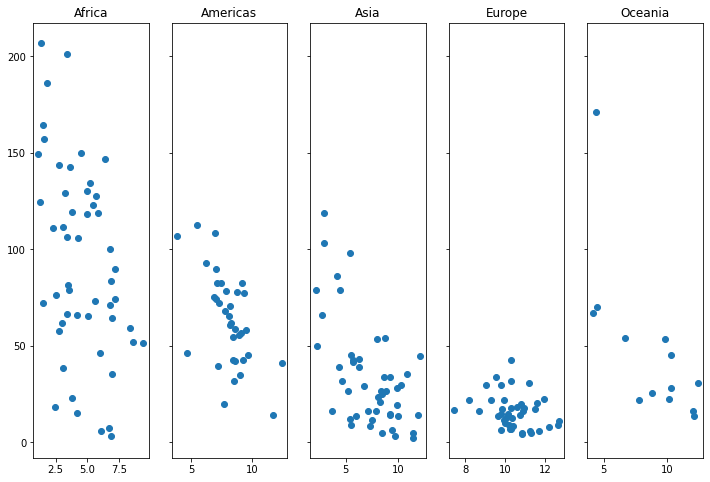

In [5]:
gfx.grouped_scatterplot(df, 'school', 'adfert', 'region')

>3. Generar un heatmap entre todas las variables (2 puntos): Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6
>
>4. A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones (3 puntos):
>
>● Comente brevemente las principales correlaciones a través de las regiones.
>
>Tip: Genere una nueva tabla segmentando con la siguiente sintaxis: = df.loc[:,['variables', 'a', 'agregar']]. N. No olvide agregar la variable región.
>
>Tip: Genere un loop para recorrer cada región y generar un heatmap.


In [6]:
region = df.loc[:,[ 'school', 'adfert','chldmort','life','literacy','co2','femlab','urban','gdp','region']]
region

school      adfert  chldmort       life   literacy    co2  femlab  \
0     6.716667    7.300000     34.75  72.316666  72.599998  15.00  0.4522   
1     3.100000  111.699997    122.75  54.733334  41.700001   1.20  0.8482   
2     8.600000   52.099998     60.25  52.250000  84.099998   9.20  0.8870   
3     1.300000  124.800003    170.50  53.783333  23.600000   0.20  0.8584   
4     2.483333   18.600000    168.50  48.866665  66.599998   0.10  1.0344   
..         ...         ...       ...        ...        ...    ...     ...   
189  10.300000   28.299999     26.75  71.533333  98.800003   3.10  0.5010   
190   4.500000   70.300003     36.00  66.500000        NaN   1.40  0.4858   
191  10.133333   22.299999     19.25  71.833336  99.000000   4.85  0.7150   
192        NaN   23.299999     36.50  66.033333        NaN    NaN     NaN   
193   6.700000   54.000000     17.75  69.966667  82.000000   1.50  0.8988   

         urban           gdp   region  
0    64.933334   7300.399902   Africa  
1    41.000000   1338.800049   Africa  
2    59.250000  12307.400391   Africa  
3    23.583334   1063.400024   Africa  
4    10.250000    349.200012   Africa  
..         ...           ...      ...  
189  20.666668   4012.600098  Oceania  
190  17.766666   2249.199951  Oceania  
191  23.266666   4072.199951  Oceania  
192  49.233334           NaN  Oceania  
193  24.500000   3809.800049  Oceania  

[194 rows x 10 columns]

<AxesSubplot:>

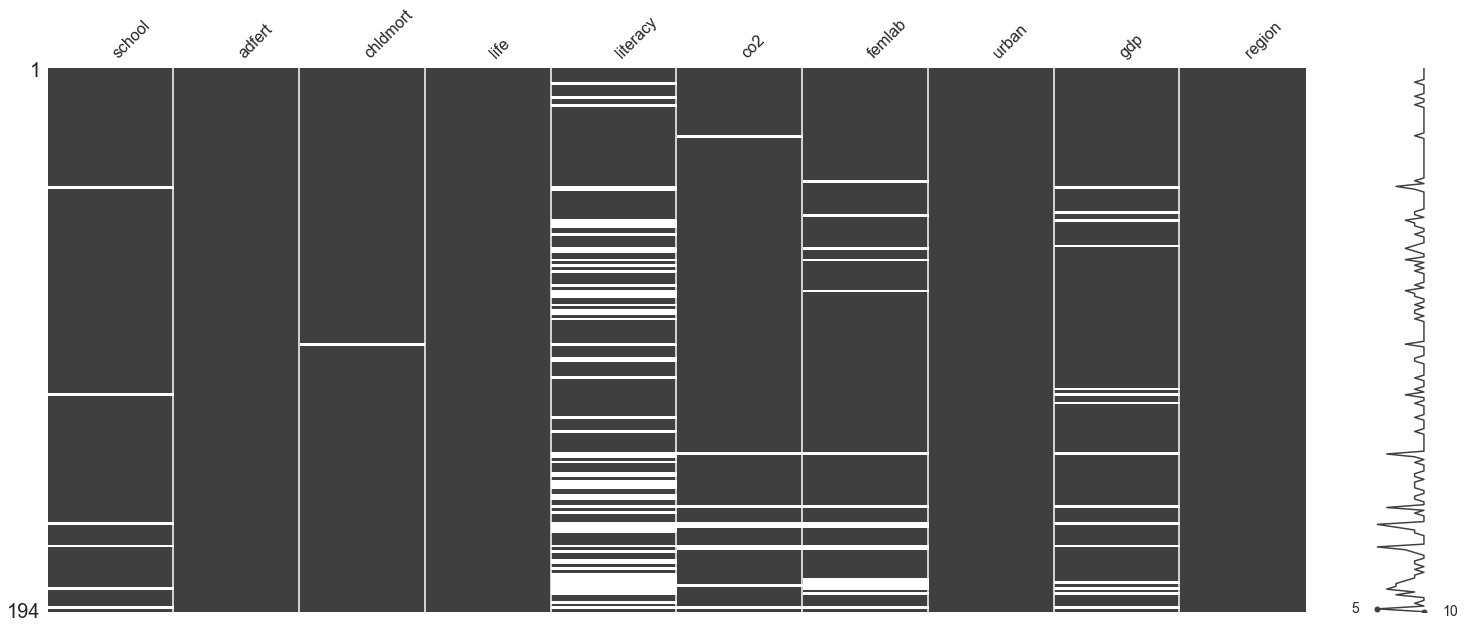

In [29]:
msno.matrix(region)

In [7]:
filter = region.filter(items=region).dropna()
filter

school      adfert  chldmort       life   literacy    co2  femlab  \
0     6.716667    7.300000     34.75  72.316666  72.599998  15.00  0.4522   
1     3.100000  111.699997    122.75  54.733334  41.700001   1.20  0.8482   
2     8.600000   52.099998     60.25  52.250000  84.099998   9.20  0.8870   
3     1.300000  124.800003    170.50  53.783333  23.600000   0.20  0.8584   
4     2.483333   18.600000    168.50  48.866665  66.599998   0.10  1.0344   
..         ...         ...       ...        ...        ...    ...     ...   
179   4.400000  171.100006    170.00  49.666668  70.000000   2.25  0.8380   
188   4.116667   66.900002     69.75  61.483334  60.099998   2.75  0.9656   
189  10.300000   28.299999     26.75  71.533333  98.800003   3.10  0.5010   
191  10.133333   22.299999     19.25  71.833336  99.000000   4.85  0.7150   
193   6.700000   54.000000     17.75  69.966667  82.000000   1.50  0.8988   

         urban           gdp   region  
0    64.933334   7300.399902   Africa  
1    41.000000   1338.800049   Africa  
2    59.250000  12307.400391   Africa  
3    23.583334   1063.400024   Africa  
4    10.250000    349.200012   Africa  
..         ...           ...      ...  
179  56.250000   4662.000000  Oceania  
188  12.516666   1953.800049  Oceania  
189  20.666668   4012.600098  Oceania  
191  23.266666   4072.199951  Oceania  
193  24.500000   3809.800049  Oceania  

[126 rows x 10 columns]

<AxesSubplot:>

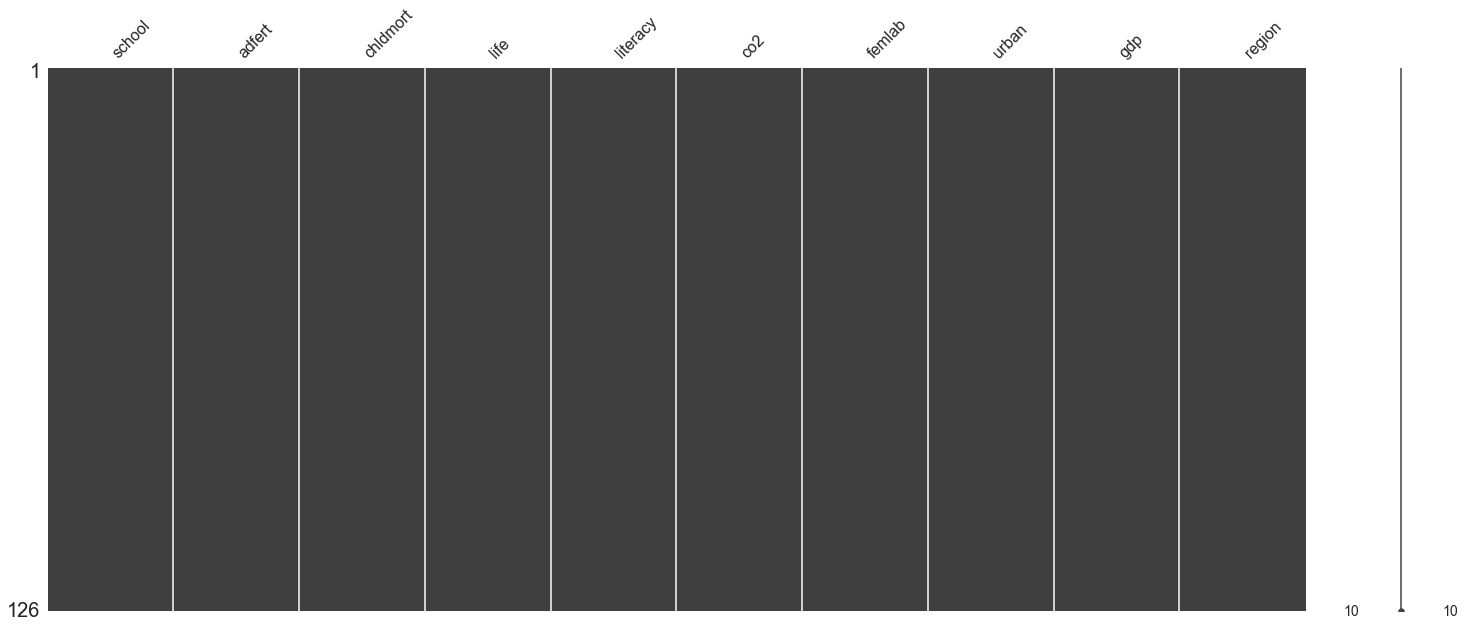

In [30]:
msno.matrix(filter)

<AxesSubplot:>

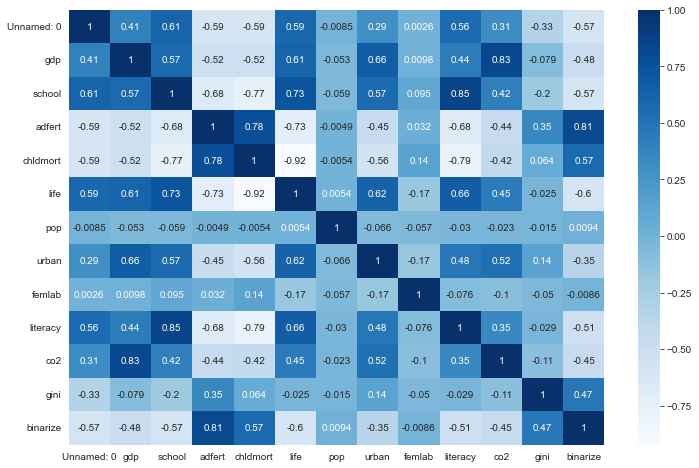

In [32]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

<AxesSubplot:>

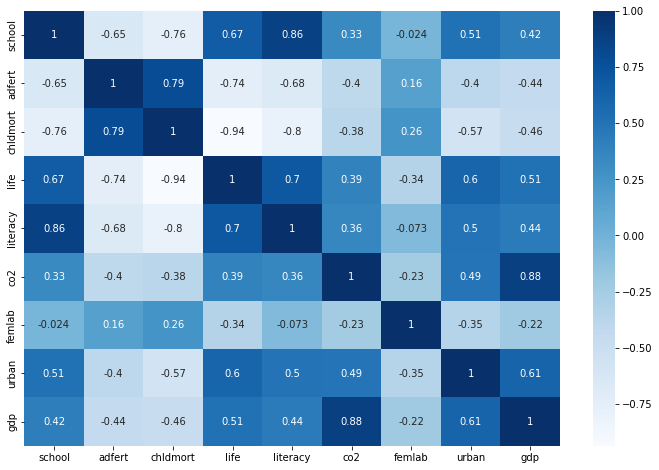

In [8]:
sns.heatmap(filter.corr(), cmap = 'Blues', annot = True)

<AxesSubplot:>

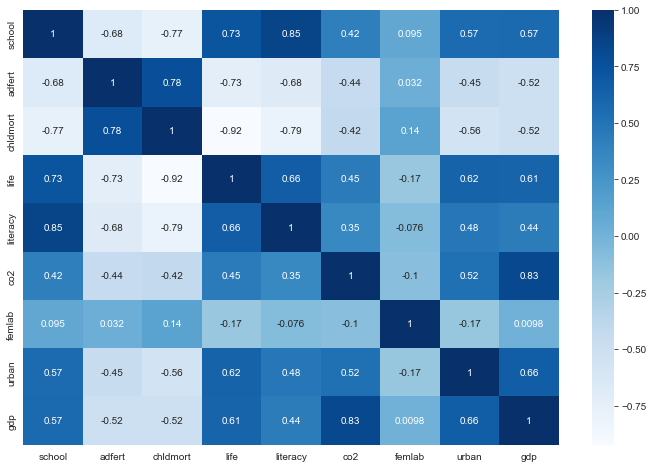

In [31]:
sns.heatmap(region.corr(), cmap = 'Blues', annot = True)

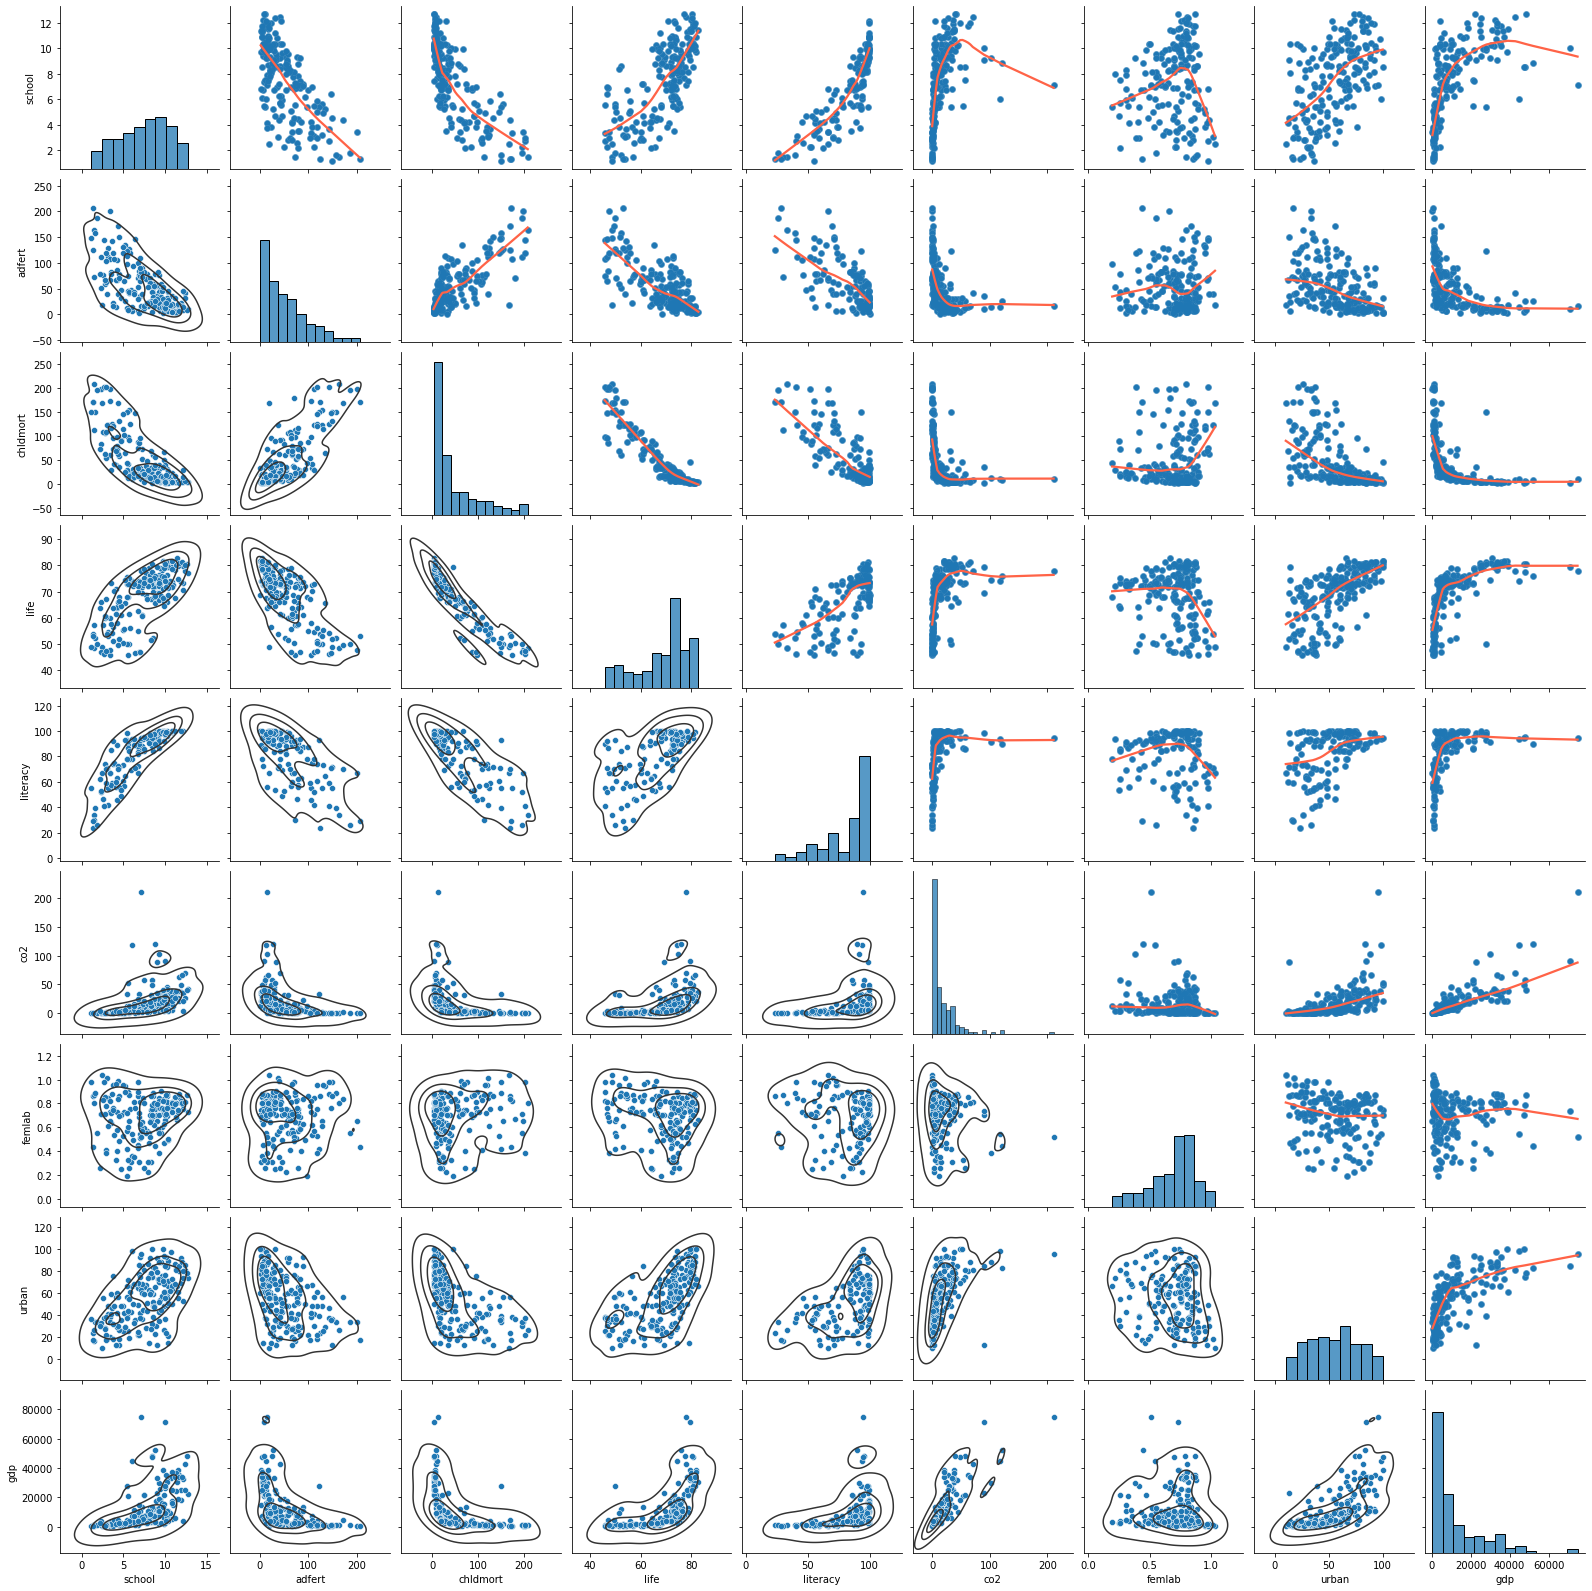

In [9]:
# Otras formas de correlacion
pairplot_1 = sns.pairplot(region, dropna = True).map_upper(sns.regplot, lowess = True, scatter_kws = {'alpha' : .5},
                                    line_kws = {'color': 'tomato'}).map_lower(sns.kdeplot, levels = 4, color='.2')

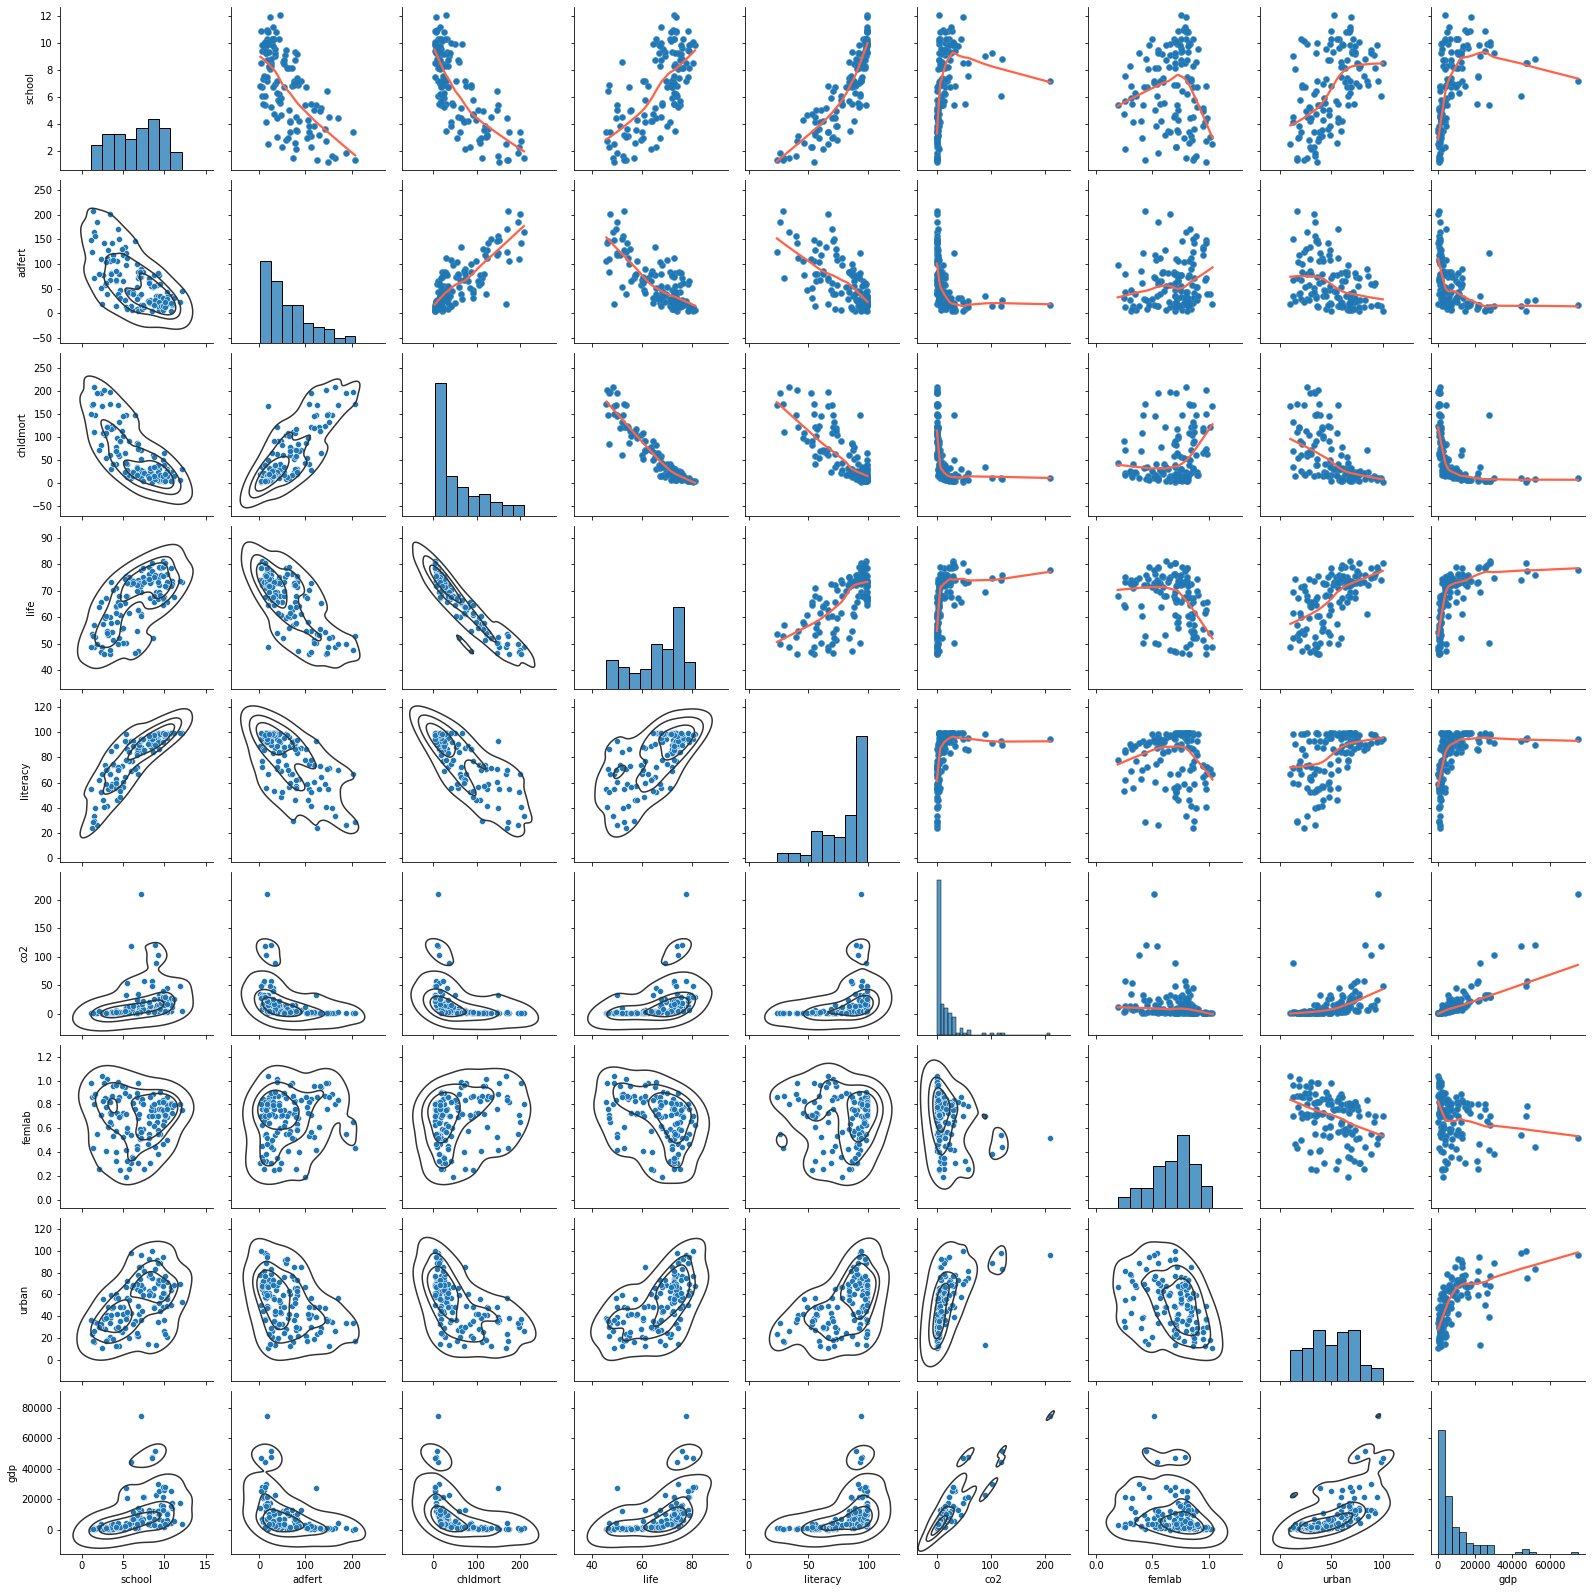

In [10]:
pairplot_1 = sns.pairplot(filter, dropna = True).map_upper(sns.regplot, lowess = True, scatter_kws = {'alpha' : .5},
                                    line_kws = {'color': 'tomato'}).map_lower(sns.kdeplot, levels = 4, color='.2')

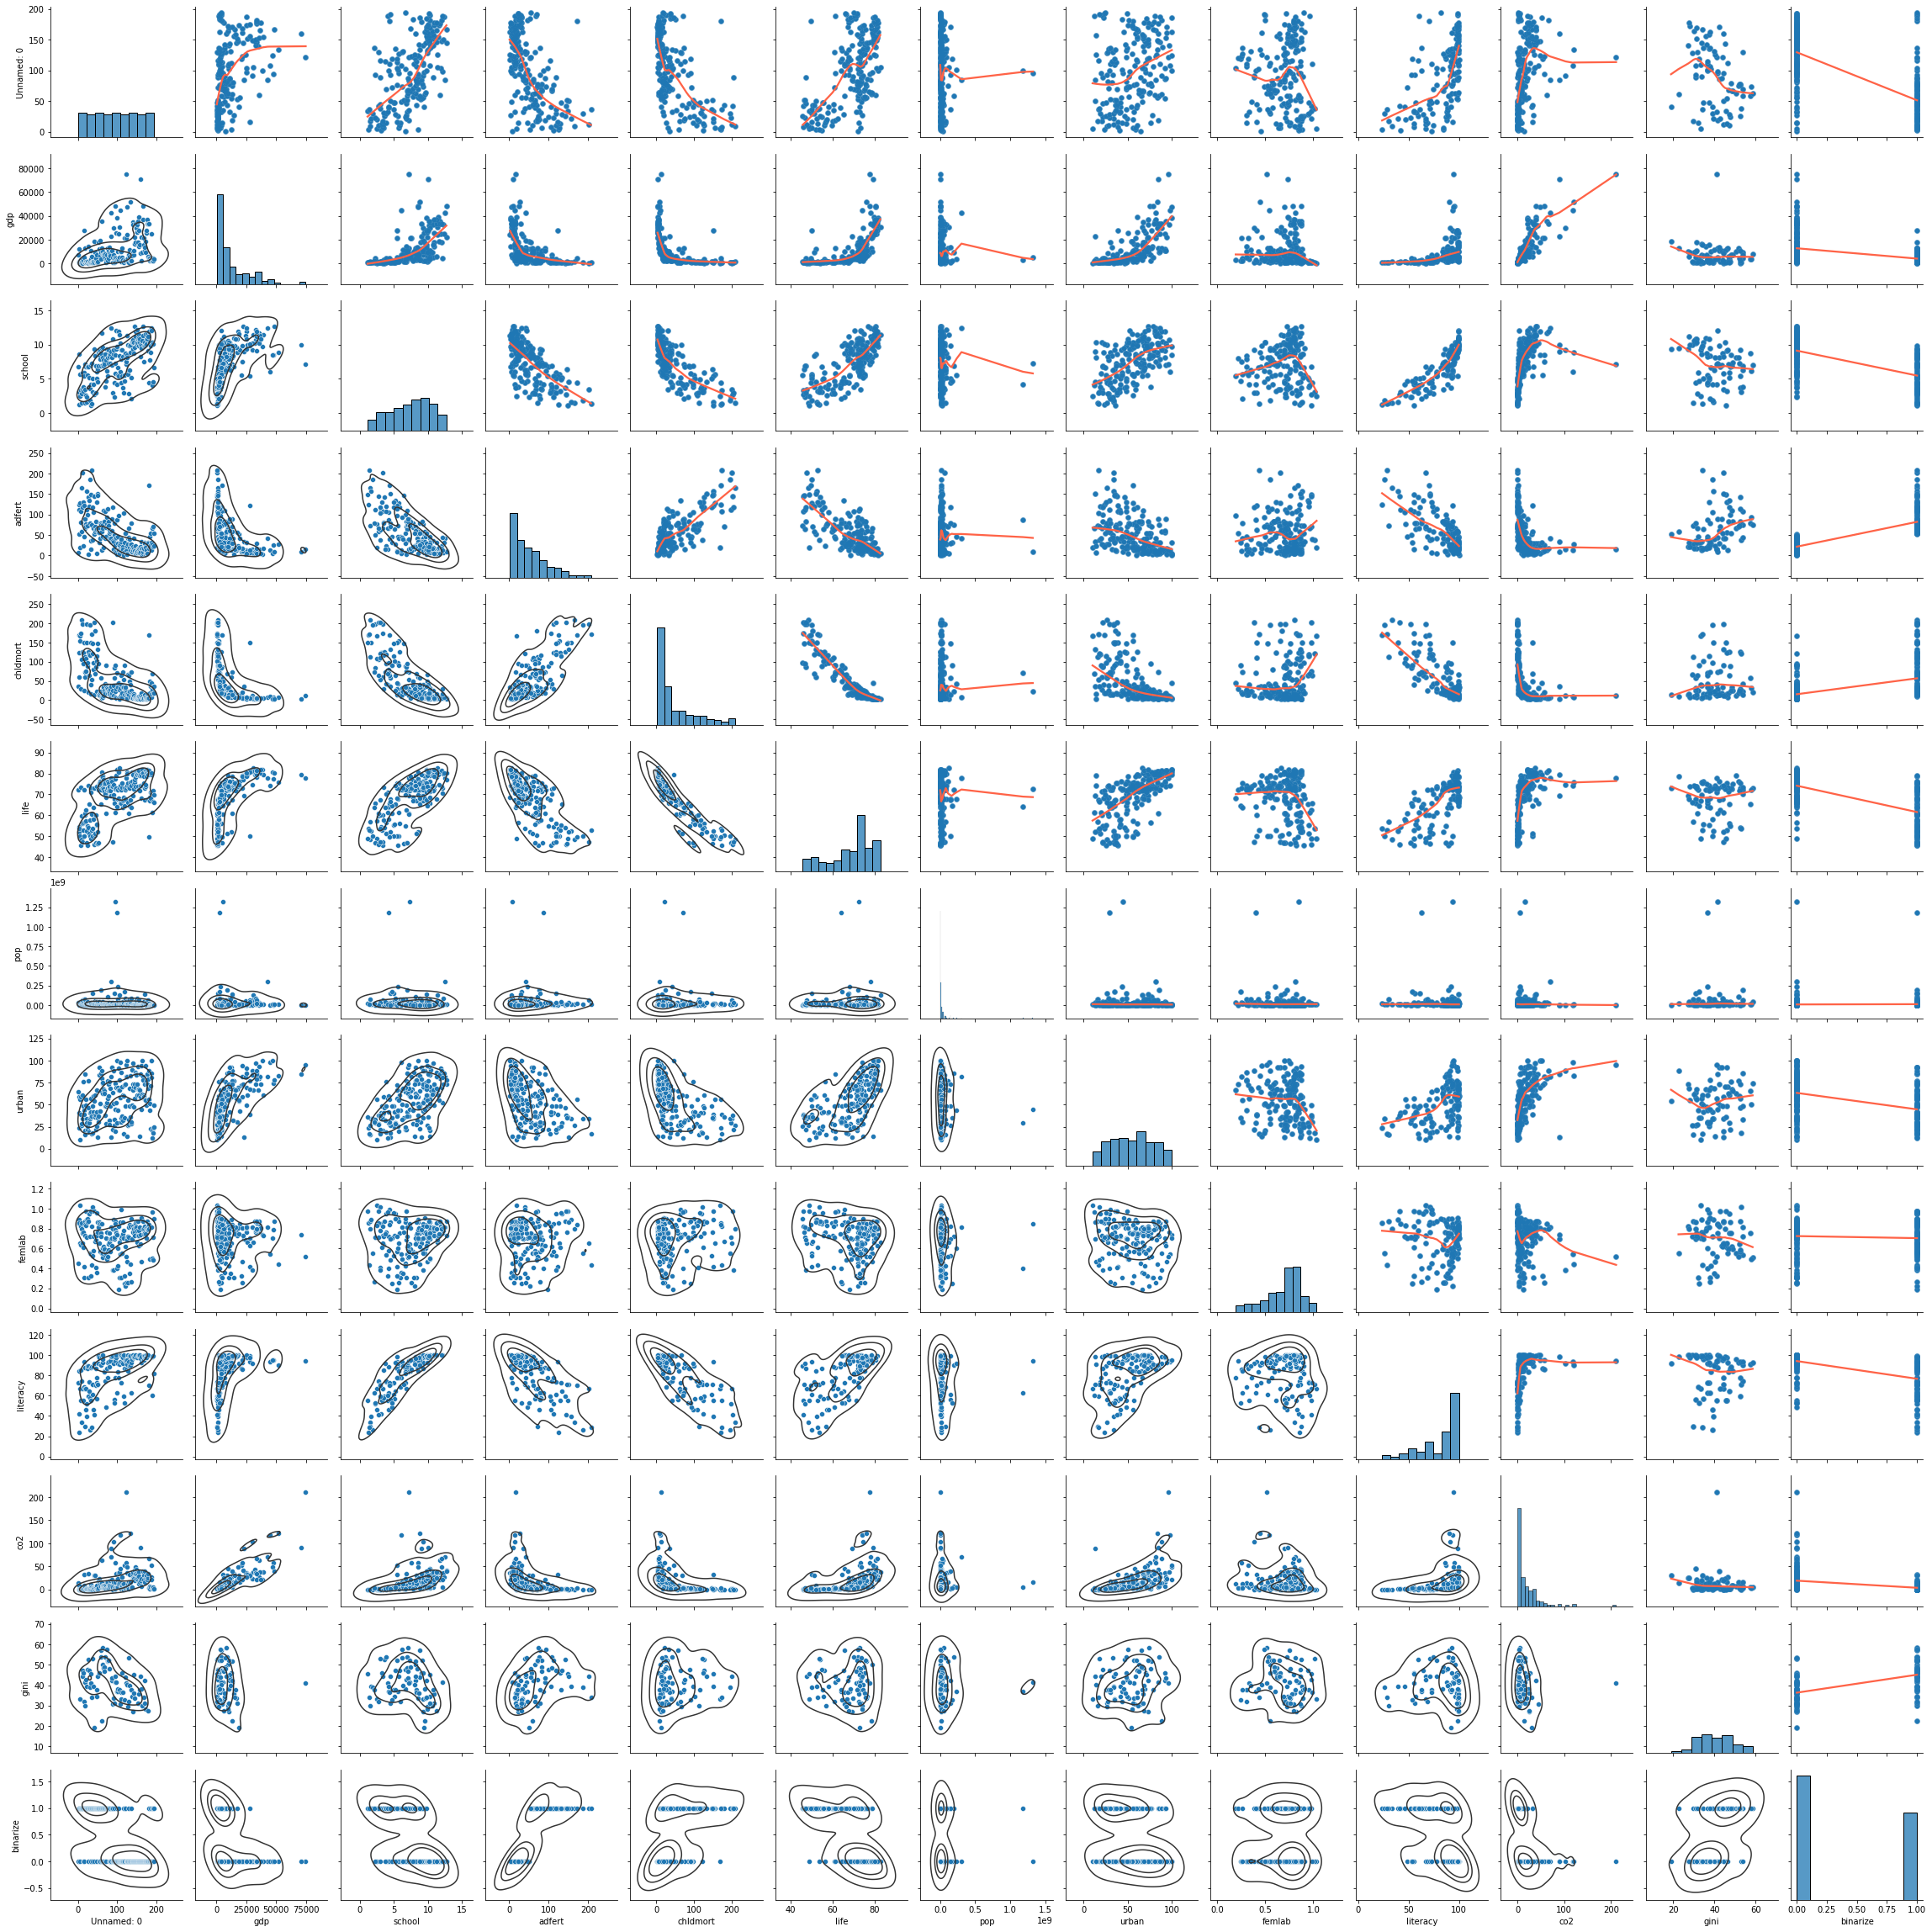

In [11]:
pairplot_1 = sns.pairplot(df, dropna = True).map_upper(sns.regplot, lowess = True, scatter_kws = {'alpha' : .5},
                                    line_kws = {'color': 'tomato'}).map_lower(sns.kdeplot, levels = 4, color='.2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the followi

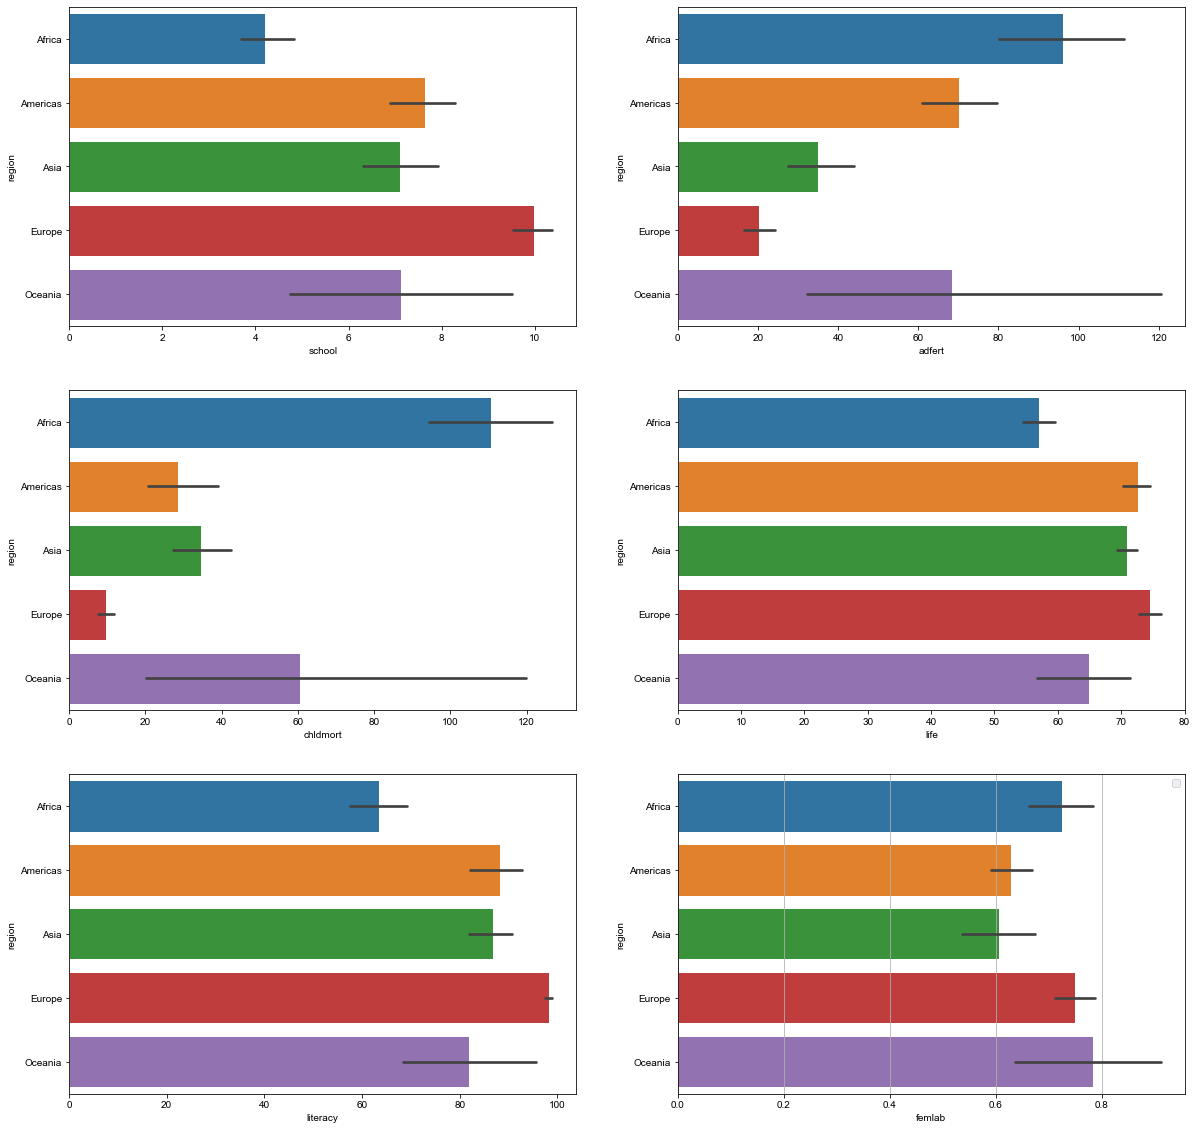

In [13]:
# Otra forma de agrupacion
f , axes = plt.subplots(3,2, figsize = (20,20))
sns.set_style('darkgrid')
plt.grid()
plt.legend()

fig1 = sns.barplot(filter['school'],filter['region'], ax = axes[0,0])
fig2 = sns.barplot(filter['adfert'],filter['region'], ax = axes[0,1])
fig3 = sns.barplot(filter['chldmort'],filter['region'], ax = axes[1,0])
fig4 = sns.barplot(filter['life'],filter['region'], ax = axes[1,1])
fig5 = sns.barplot(filter['literacy'],filter['region'], ax = axes[2,0])
fig6 = sns.barplot(filter['femlab'],filter['region'], ax = axes[2,1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the followi

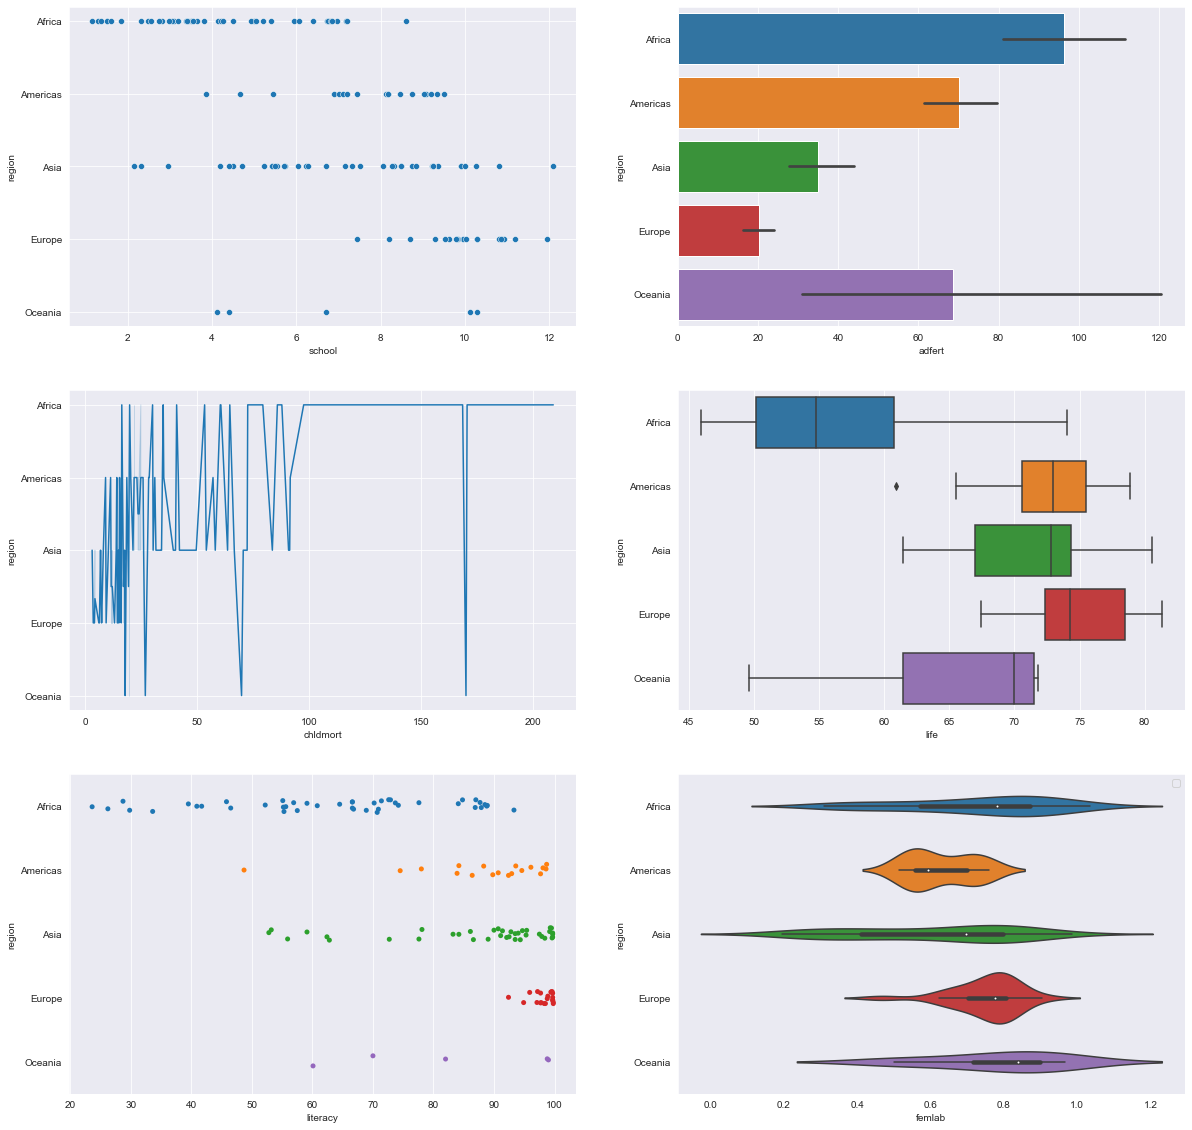

In [14]:
k , axes = plt.subplots(3,2, figsize = (20,20))
sns.set_style('darkgrid')
plt.grid()
plt.legend()

fig7 = sns.scatterplot(filter['school'],filter['region'], ax = axes[0,0])#, kind = 'reg'
fig8 = sns.barplot(filter['adfert'],filter['region'], ax = axes[0,1])
fig9 = sns.lineplot(filter['chldmort'],filter['region'], ax = axes[1,0])
fig10 = sns.boxplot(filter['life'],filter['region'], ax = axes[1,1])
fig11 = sns.stripplot(filter['literacy'],filter['region'], ax = axes[2,0])
fig12 = sns.violinplot(filter['femlab'],filter['region'], ax = axes[2,1])

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


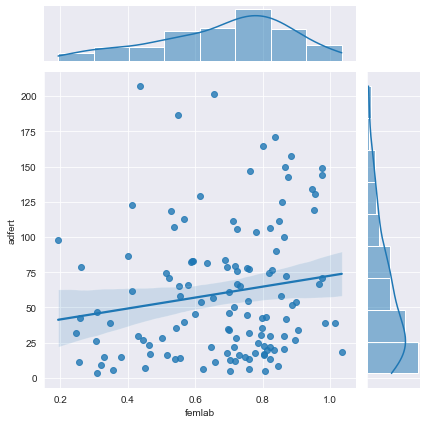

In [15]:
sns.jointplot(filter['femlab'],filter['adfert'], dropna = True, kind = 'reg')

In [16]:
df_def = region.loc[:, ['region', 'adfert', 'chldmort', "life"]]
df_def

region      adfert  chldmort       life
0     Africa    7.300000     34.75  72.316666
1     Africa  111.699997    122.75  54.733334
2     Africa   52.099998     60.25  52.250000
3     Africa  124.800003    170.50  53.783333
4     Africa   18.600000    168.50  48.866665
..       ...         ...       ...        ...
189  Oceania   28.299999     26.75  71.533333
190  Oceania   70.300003     36.00  66.500000
191  Oceania   22.299999     19.25  71.833336
192  Oceania   23.299999     36.50  66.033333
193  Oceania   54.000000     17.75  69.966667

[194 rows x 4 columns]

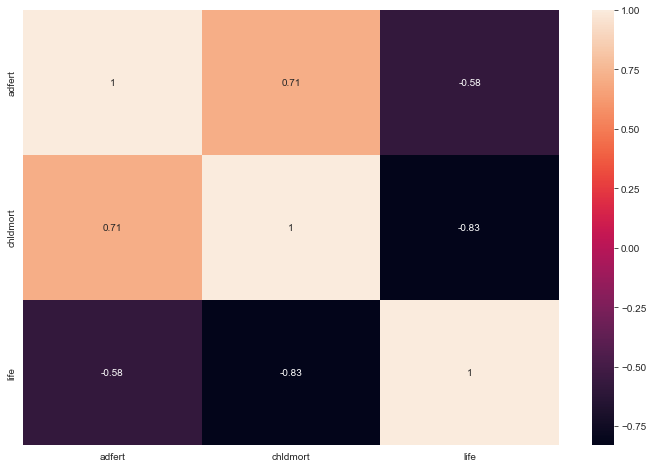

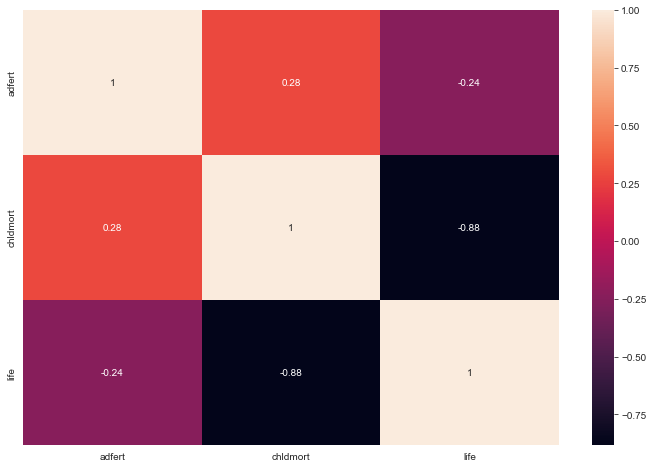

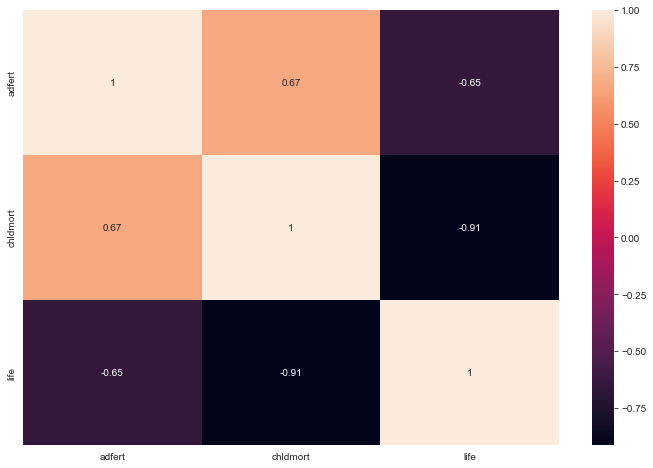

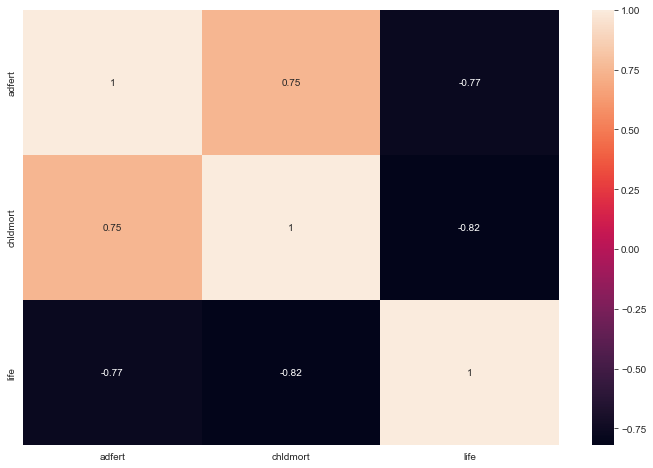

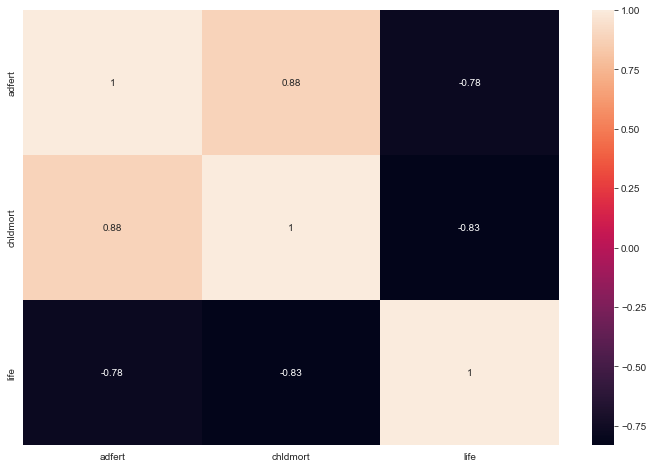

In [17]:
for i in df_def['region'].unique():
    plt.figure()
    sns.heatmap(df_def[df_def['region'] == i].corr(), annot=True)

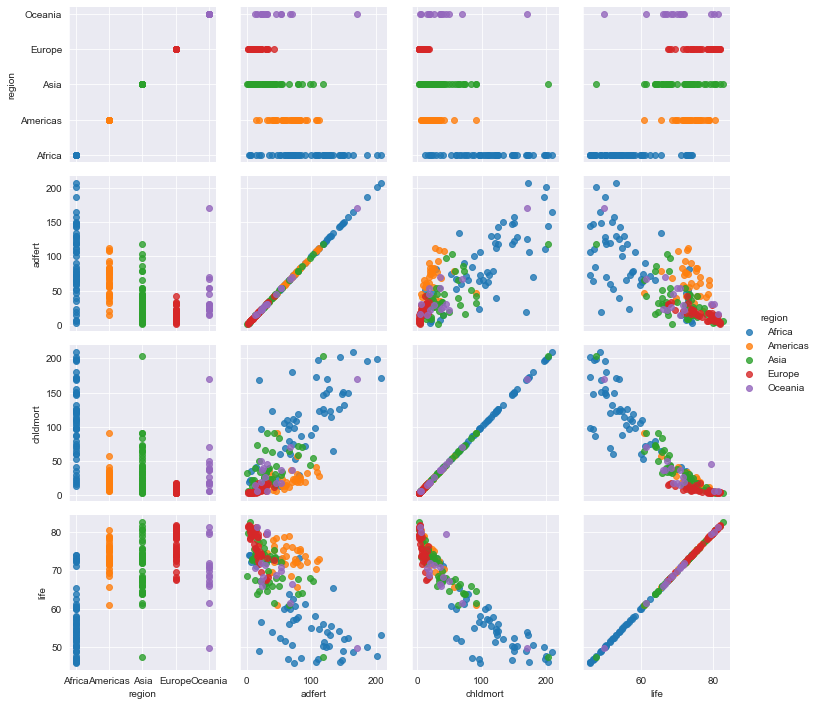

In [18]:
pgrid = sns.PairGrid(df, vars = df_def, hue='region')
pgrid.map(plt.scatter, alpha=0.8)
pgrid.add_legend()

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='school', ylabel='region'>

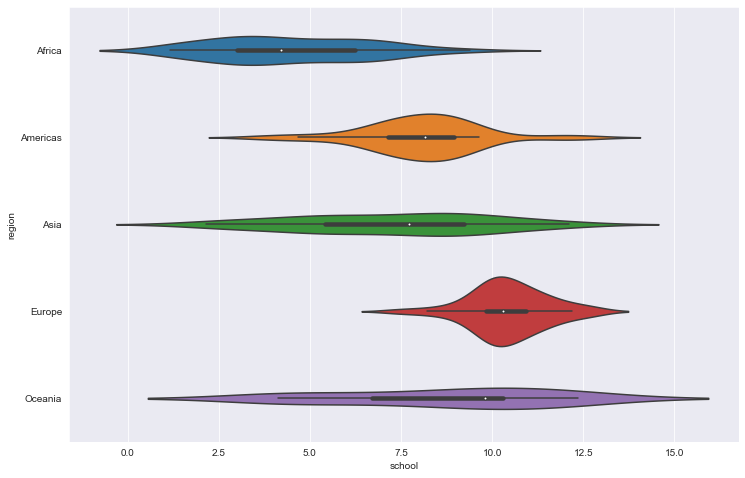

In [19]:
sns.violinplot('school', 'region', data = df)

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adfert', ylabel='region'>

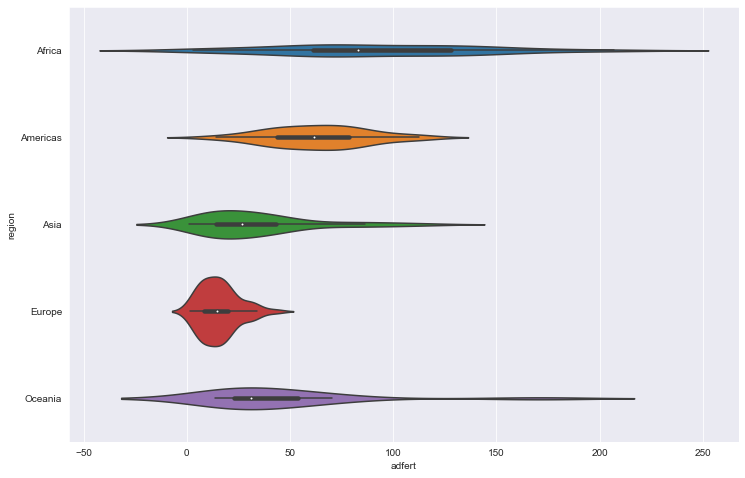

In [20]:
sns.violinplot('adfert', 'region', data = df)


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chldmort', ylabel='region'>

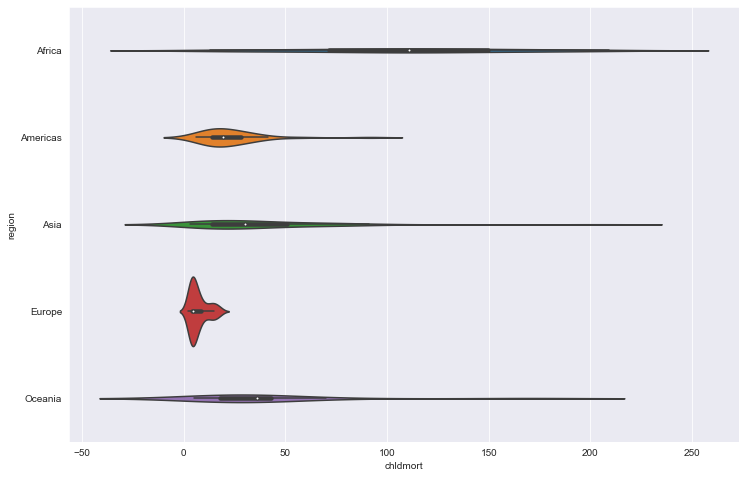

In [21]:
sns.violinplot('chldmort', 'region', data = df)


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='life', ylabel='region'>

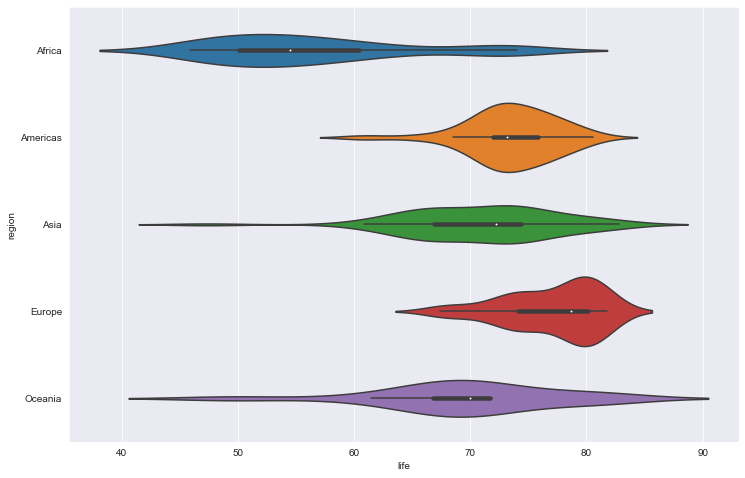

In [22]:
sns.violinplot('life', 'region', data = df)


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='literacy', ylabel='region'>

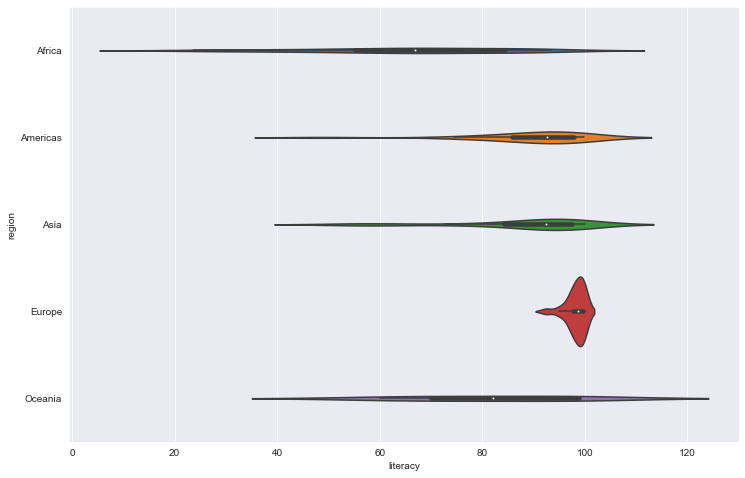

In [23]:
sns.violinplot('literacy', 'region', data = df)


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='femlab', ylabel='region'>

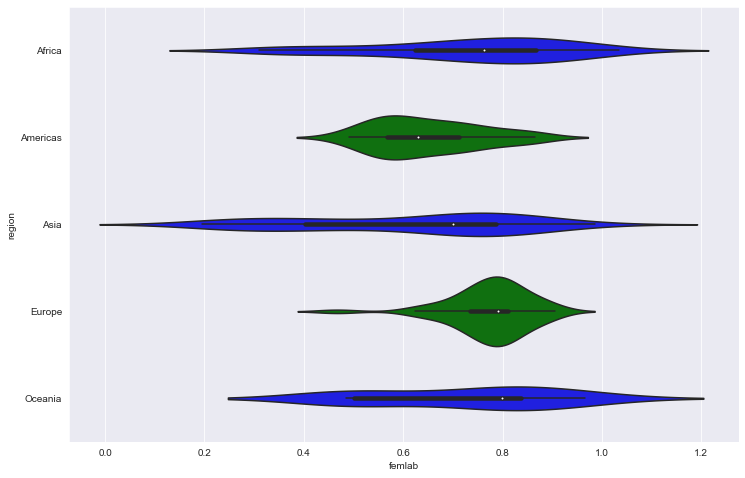

In [24]:
sns.violinplot('femlab', 'region', data = df, palette = ['blue', 'green'])